# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat Dataset
clustering_df = pd.read_csv(r"Student-Performance-Factors.csv")
clustering_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
# Melihat kolom apa saja yang ada di dataset
clustering_df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

**Conclusion:**

Dataset ini memiliki :
- Baris : 6.607
- Kolom : 20

Penjelasan kolom:
1. Hours_Studied : Jumlah jam yang dihabiskan untuk belajar per minggu.
2. Attendance : Persentase kelas yang dihadiri oleh siswa.
3. Parental_Involvement : Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi).
4. Access_to_Resources : Ketersediaan sumber daya pendidikan (Rendah, Sedang, Tinggi).
5. Extracurricular_Activities : Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak).
6. Sleep_Hours : Rata-rata jumlah jam tidur per malam.
7. Previous_Scores : Nilai ujian sebelumnya.
8. Motivation_Level	:  Tingkat motivasi siswa (Rendah, Sedang, Tinggi).
9. Internet_Access : Ketersediaan akses internet (Ya, Tidak).
10. Tutoring_Sessions : Jumlah sesi bimbingan belajar yang dihadiri per bulan.
11. Family_Income : Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi).
12. Teacher_Quality : Kualitas pengajaran guru (Rendah, Sedang, Tinggi).
13. School_Type	: Jenis sekolah yang dihadiri (Negeri, Swasta).
14. Peer_Influence : Pengaruh teman sebaya terhadap prestasi akademik (Positif, Netral, Negatif).
15. Physical_Activity : Rata-rata jumlah jam aktivitas fisik per minggu.
16. Learning_Disabilities : Keberadaan kesulitan belajar (Ya, Tidak).
17. Parental_Education_Level : Tingkat pendidikan tertinggi orang tua (SMA, Perguruan Tinggi, Pascasarjana).
18. Distance_from_Home : Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh).
19. Gender: Jenis kelamin siswa (Laki-laki, Perempuan).
20. Exam_Score: Nilai akhir ujian siswa.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [4]:
# Meninjau jumlah baris dan kolom dalam dataset
clustering_df.shape

(6607, 20)

In [5]:
# Meninjau jenis data di setiap kolom (numerikal atau kategorikal)
clustering_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Dari output di atas, berikut adalah klasifikasi kolom berdasarkan jenis data:
##### Kolom Numerikal (int64)
- Hours_Studied
- Attendance
- Sleep_Hours
- Previous_Scores
- Tutoring_Sessions
- Physical_Activity
- Exam_Score <br>
Total = 7

##### Kolom Kategorikal (object)
- Parental_Involvement
- Access_to_Resources
- Extracurricular_Activities
- Motivation_Level
- Internet_Access
- Family_Income
- Teacher_Quality
- School_Type
- Peer_Influence
- Learning_Disabilities
- Parental_Education_Level
- Distance_from_Home
- Gender <br>
Total = 13

In [6]:
# Meninjau jenis data di setiap kolom (numerikal atau kategorikal)
clustering_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

### **2. Menangani Missing Values (Data yang Hilang)**

Kita akan memeriksa missing values dalam dataset, yang bertujuan untuk mencegah kesalahan ketika melakukan analisis, mencegah error pada model, dan meningkatkan performa model

Dari hasil pengecekan, ditemukan bahwa 3 kolom memiliki missing values, yaitu :

- Teacher_Quality : 78
- Parental_Education_Level : 90
- Distance_from_Home : 67

Sementara itu, 17 kolom lainnya tidak memiliki missing values sama sekali. Selanjutnya, kita akan menentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [7]:
# Cek jumlah missing values per kolom
missing_values = clustering_df.isnull().sum()
missing_values

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Dari hasil pengecekan, ditemukan bahwa 3 kolom memiliki missing values, yaitu :

- Teacher_Quality : 78
- Parental_Education_Level : 90
- Distance_from_Home : 67

Sementara itu, 17 kolom lainnya tidak memiliki missing values sama sekali. Selanjutnya, kita akan menentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [8]:
# Total data
total_rows = len(clustering_df)

# Hitung persentase missing values per kolom
md = (clustering_df.isnull().sum() / total_rows) * 100
print(md[md > 0])

Teacher_Quality             1.180566
Parental_Education_Level    1.362192
Distance_from_Home          1.014076
dtype: float64


**Interpretasi :**
- Semua persentase dibawah 2%, yang berarti **jumlah data yang hilang sangat kecil**.
- Karena pengaruhnya terhadap distribusi data sangat kecil, **Imputasi (Pengisian)** sangat memungkinkan kita gunakan sebagai langkah terbaik menangani missing values.

### **3. Analisis Distribusi dan Korelasi**

In [9]:
# Analisis distribusi variabel numerik dengan statistik deskriptif
numerik_cols = clustering_df.select_dtypes(include='number').columns
clustering_df[numerik_cols].describe().round(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00
mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
std,5.99,11.55,1.47,14.40,1.23,1.03,3.89
min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
25%,16.00,70.00,6.00,63.00,1.00,2.00,65.00
50%,20.00,80.00,7.00,75.00,1.00,3.00,67.00
75%,24.00,90.00,8.00,88.00,2.00,4.00,69.00
max,44.00,100.00,10.00,100.00,8.00,6.00,101.00


**Insight Awal:**
- Distribusi sebagian besar simetris (mean ≈ median), yang berarti data relatif normal

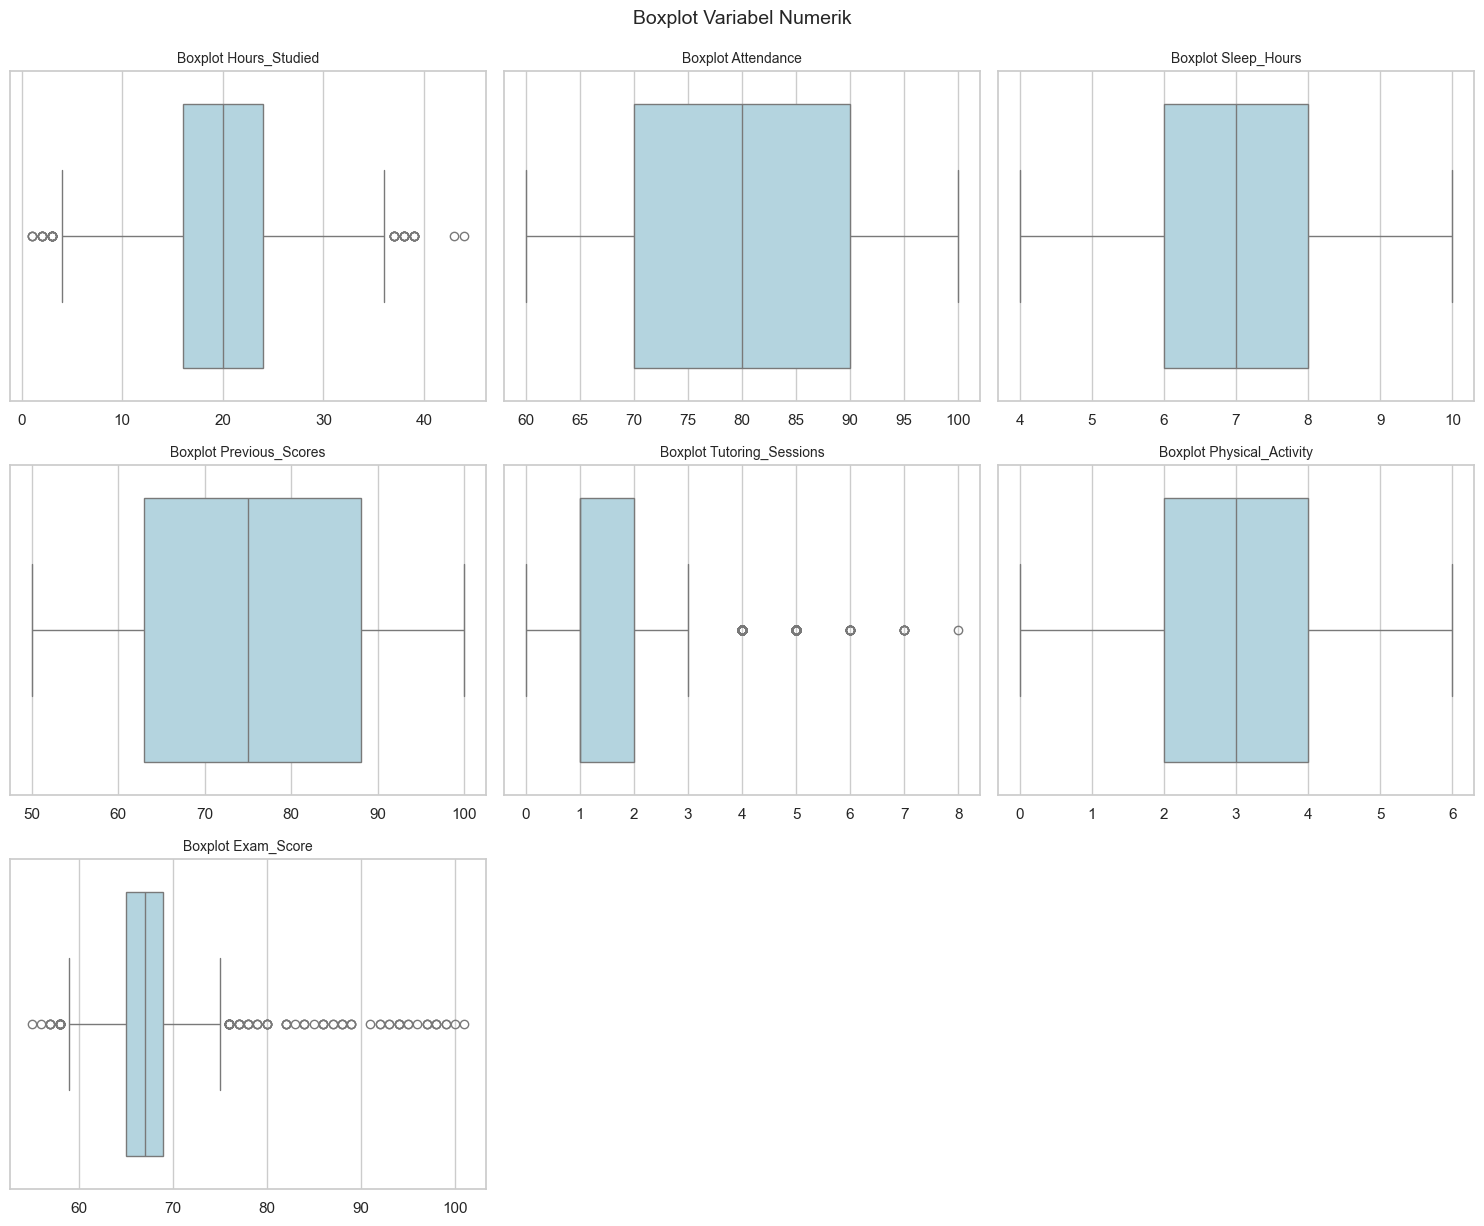

In [10]:
# Analisis distribusi variabel numerik dengan visualisasi
# List variabel numerik
numerik_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                'Previous_Scores', 'Tutoring_Sessions', 
                'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i, col in enumerate(numerik_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=clustering_df, x=col, color='lightblue')
    plt.title(f'Boxplot {col}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle("Boxplot Variabel Numerik", fontsize=14, y=1.02)
plt.show()

**Insight:**
- Variabel seperti Tutoring_Sessions, Hours_Studied, dan Exam_Score memiliki outlier, yang artinya ada siswa dengan karakteristik ekstrem.
- Variabel seperti Attendance, Sleep_Hours, Previous_Score, dan Physical_Activity terlihat **relatif stabil dan normal**, tanpa variasi yang besar atau masalah signifikan dengan data

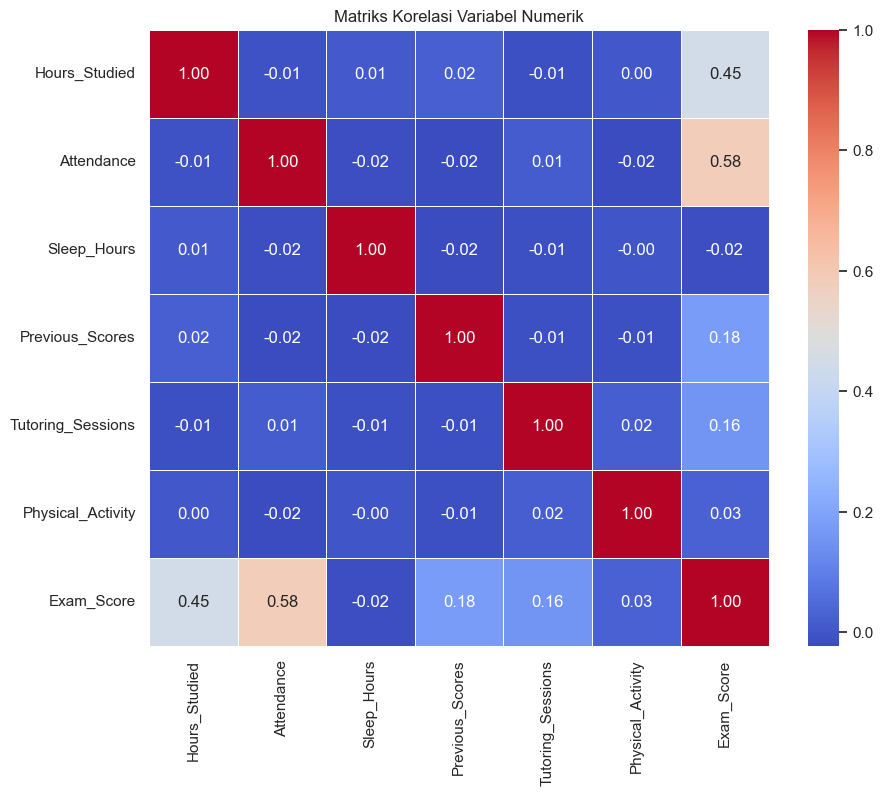

In [11]:
# Memeriksa hubungan antara variabel
# Menghitung matriks korelasi
corr_matrix = clustering_df[numerik_cols].corr()

# Visualisasikan korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

**Analisis Matriks Korelasi :**
1. Hours_Studied dan Exam_Score
   - Korelasi : 0.45
   - Ada hubungan positif antara jam belajar dan nilai ujian, meskipun tidak terlalu kuat. ini berarti semakin banyak siswa belajar, semakin tinggi kemungkinan mereka untuk mendapatkan nilai yang lebih baik.

2. Attendace dan Exam_Score
    - Korelasi : 0.58
    - Kehadiran yang baik berhubungan dengan nilai ujian yang  tinggi. Ini menunjukkan bahwa kehadiran siswa berpengaruh cukup signifikan terhadap performa ujian mereka.
      
3. Previous_Scores dan Exam_Score
    - Korelasi : 0.18
    - Nilai sebelumnya memiliki hubungan lemah dengan nilai ujian saat ini, yang menunjukkan bahwa nilai sebelumnya sedikit berpengaruh meskipun ada faktor lain yang lebih berperan.
      
4. Tutoring_Sessions dan Exam_Score
    - Korelasi : 0.16
    - Menunjukkan bahwa jumlah bimbingan yang diikuti tidak terlalu mempengaruhi nilai ujian siswa.
      
5.  Physical_Activity dan Exam_Score
    - Korelasi : 0.03
    - Tidak ada hubungan signifikan antara aktivitas fisik dan nilai ujian, ini menunjukkan bahwa aktivitas fisik tidak terlalu berpengaruh pada performa ujian.

### **4. Visualisasi Data**

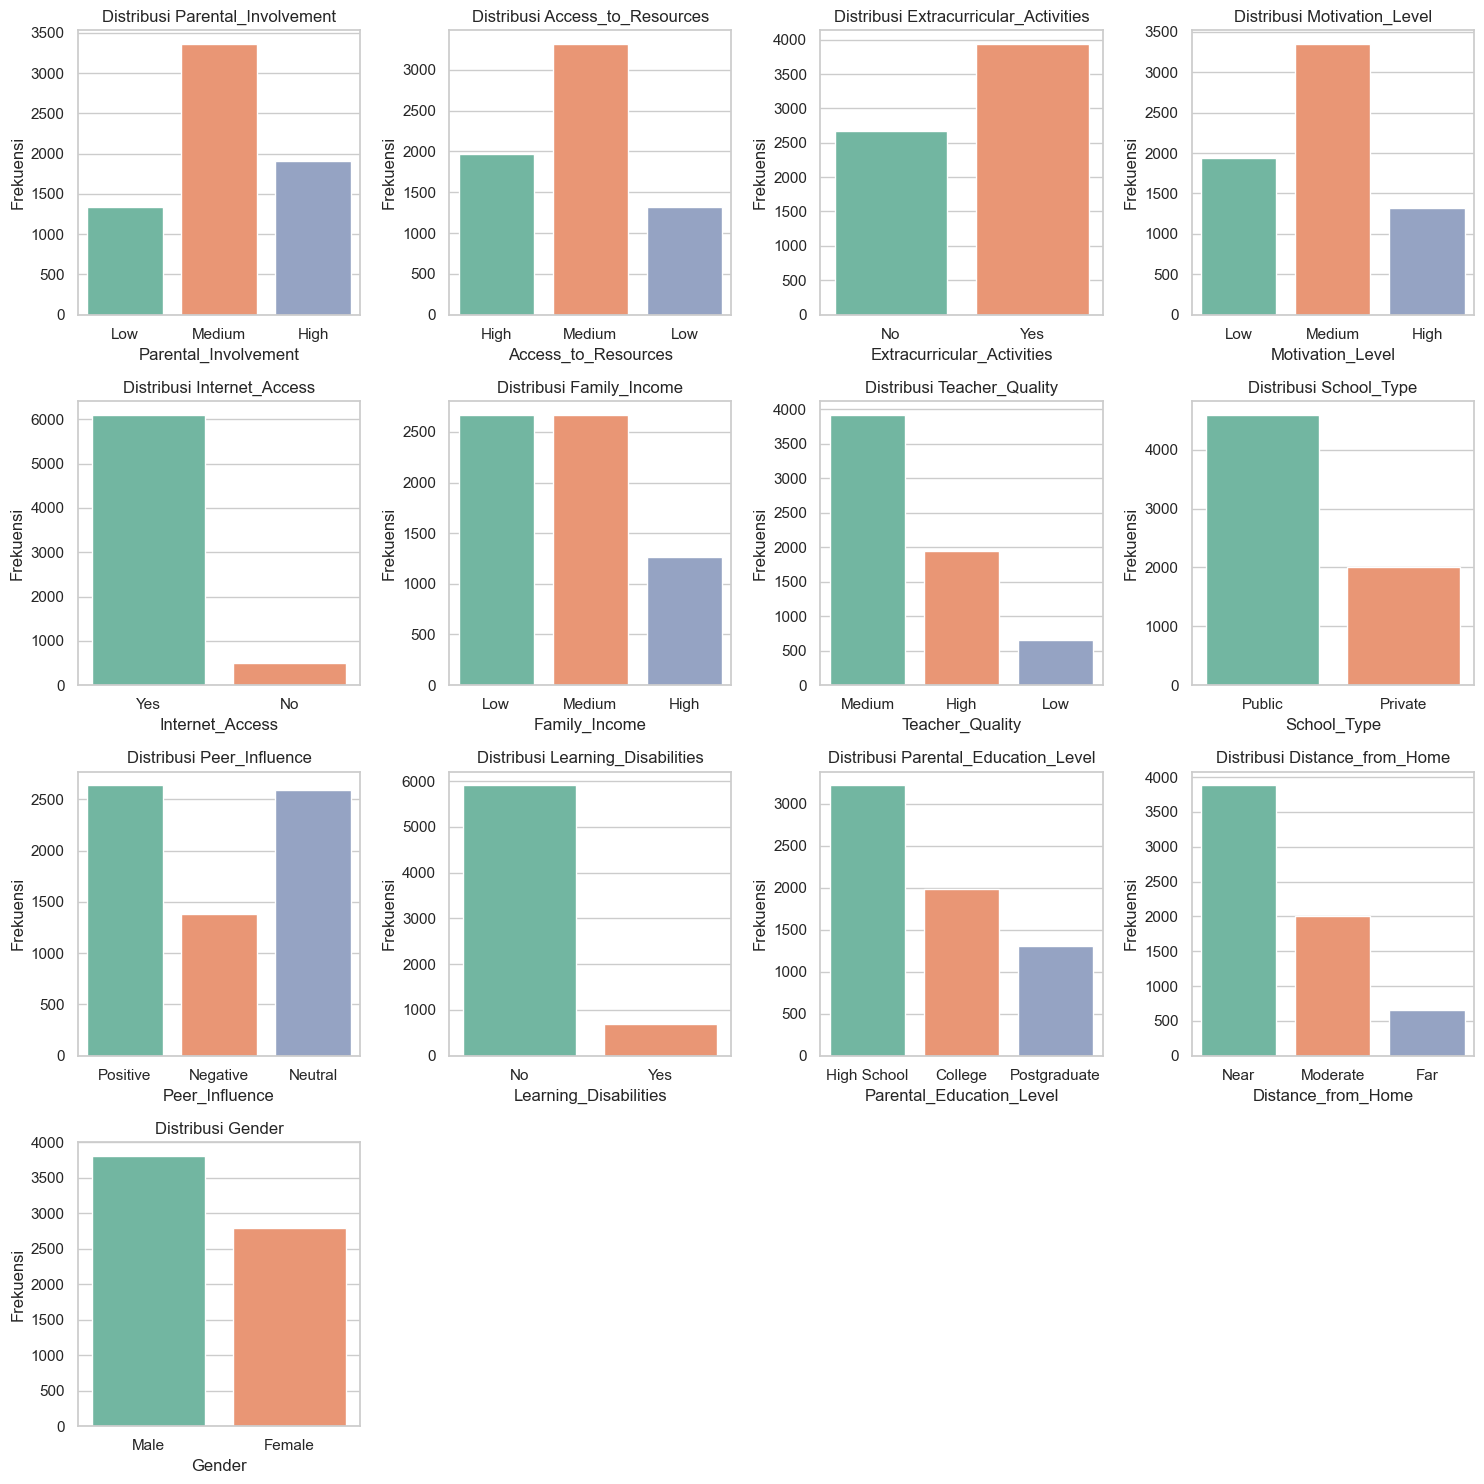

In [12]:
# Daftar variabel kategorikal
kategorikal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 
                    'Distance_from_Home', 'Gender']

# Set ukuran figure
plt.figure(figsize=(15, 15))

# Loop untuk membuat count plot untuk setiap kolom kategorikal
for i, col in enumerate(kategorikal_cols, 1):
    plt.subplot(4, 4, i)  # Grid layout untuk plot
    sns.countplot(data=clustering_df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Visualisasi diatas menggambarkan distribusi frekuensi dalam variabel kategorikal, berikut analisis berdasarkan visualisasi ini:
- Parental Invovement<br>
Sebagian besar responden terlibat dalam kategori Low dan Medium, dengan sedikit berada di kategori High. ini menunjukkan bahwa banyak orang tua yang mungkin kurang terlibat secara aktif dalam pendidikan anak-anak mereka. Untuk yang medium, orang tua bisa dikatakan aktif namun tidak terlalu fokus dalam memperhatikan pendidikan anak-anak mereka.

- Access to Resources <br>
Banyak responden memiliki akses ke sumber daya dalam kategori High dan Medium, ini berarti sebagian besar siswa atau keluarga memiliki akses ke berbagai sumber daya yang mendukung pendidikan.

- Family Income <br>
Sebagian besar keluarga memiliki pendapatan dalam kategori Low dan Medium, dengan sedikit berada pada kategori High. ini menunjukkan ketimpangan pendapatan di antara keluarga siswa.

- Peer Influence <br>
Responden lebih banyak merasakan Netral dan Positive pengaruh dari teman sebaya, yang berarti tidak banyak teman sebaya responden yang membawa pengaruh negatif.

- Teacher Quality <br>
Mayoritas guru dianggap memiliki medium dan high kualitas, menunjukkan bahwa sebagian besar siswa merasa bahwa pengajaran mereka cukup baik.

- Motivation Level <br>
Sebagian besar siswa berada dalam kategori Medium untuk tingkat motivasi, dengan beberapa yang snagat termotivasi (kategori High), tetapi masih banyak juga yang kurang termotivasi (Low)

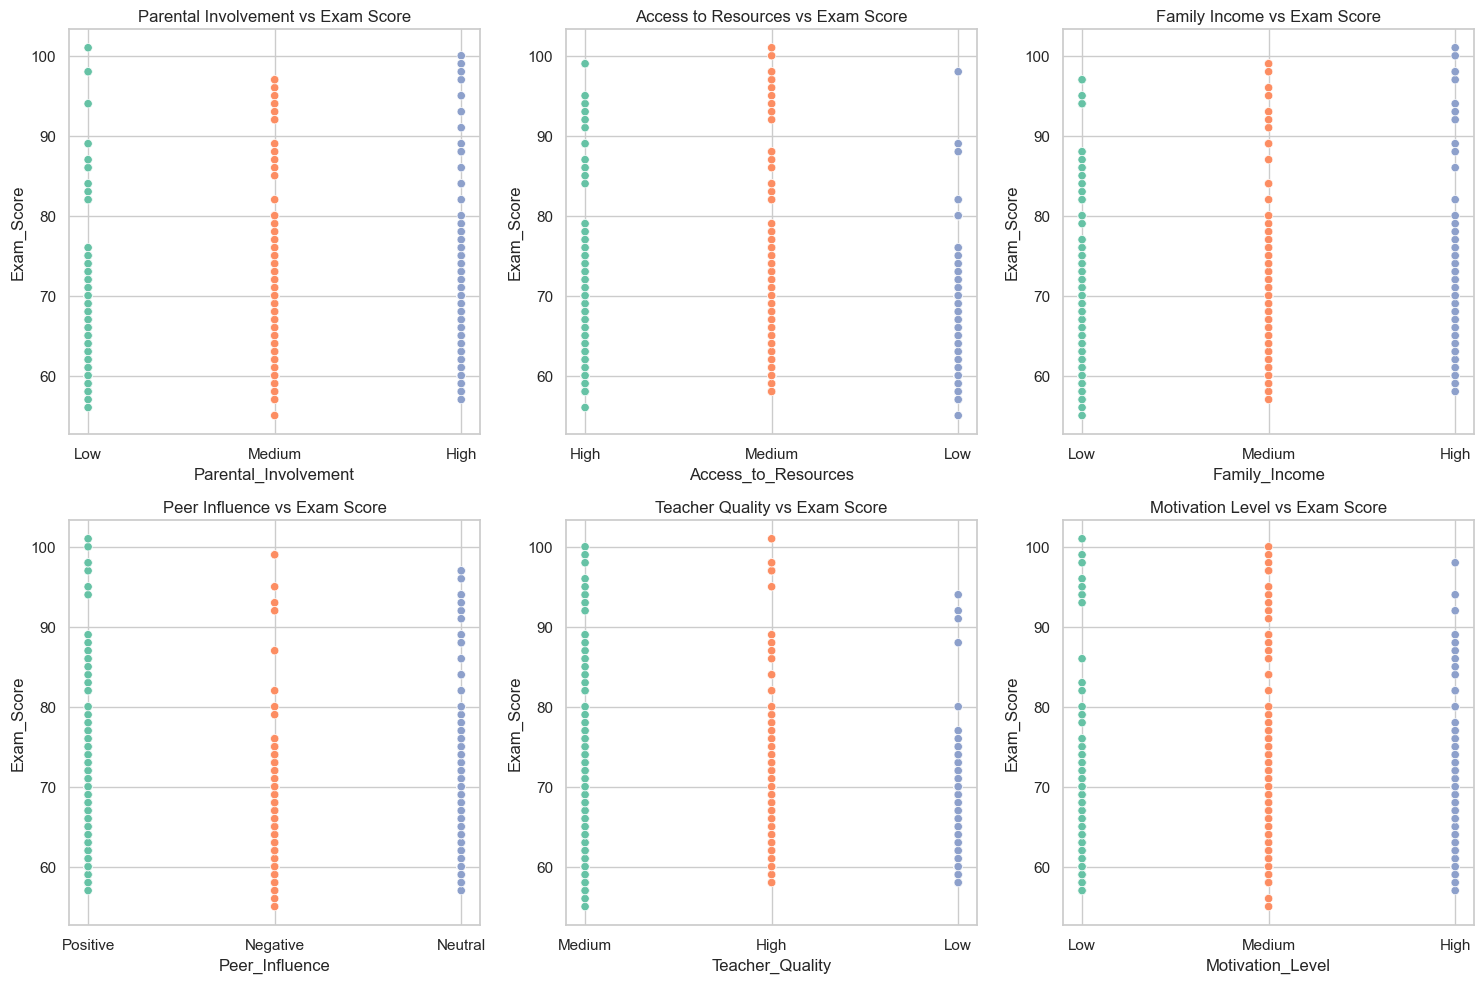

In [13]:
plt.figure(figsize=(15, 10))

# 1. Parental Involvement vs Exam Score
plt.subplot(2, 3, 1)
sns.scatterplot(x='Parental_Involvement', y='Exam_Score', data=clustering_df, hue='Parental_Involvement', palette='Set2', legend=False )
plt.title('Parental Involvement vs Exam Score')

# 2. Access to Resources vs Exam Score
plt.subplot(2, 3, 2)
sns.scatterplot(x='Access_to_Resources', y='Exam_Score', data=clustering_df, hue='Access_to_Resources', palette='Set2', legend=False)
plt.title('Access to Resources vs Exam Score')

# 3. Family Income vs Exam Score
plt.subplot(2, 3, 3)
sns.scatterplot(x='Family_Income', y='Exam_Score', data=clustering_df, hue='Family_Income', palette='Set2', legend=False)
plt.title('Family Income vs Exam Score')

# 4. Peer Influence vs Exam Score
plt.subplot(2, 3, 4)
sns.scatterplot(x='Peer_Influence', y='Exam_Score', data=clustering_df, hue='Peer_Influence', palette='Set2', legend=False)
plt.title('Peer Influence vs Exam Score')

# 5. Teacher Quality vs Exam Score
plt.subplot(2, 3, 5)
sns.scatterplot(x='Teacher_Quality', y='Exam_Score', data=clustering_df, hue='Teacher_Quality', palette='Set2', legend=False)
plt.title('Teacher Quality vs Exam Score')

# 6. Motivation Level vs Exam Score
plt.subplot(2, 3, 6)
sns.scatterplot(x='Motivation_Level', y='Exam_Score', data=clustering_df, hue='Motivation_Level', palette='Set2', legend=False)
plt.title('Motivation Level vs Exam Score')

plt.tight_layout()
plt.show()


#### **Kesimpulan :**
- Parental Involvement, Access to Resources, dan Family Income dan Motivation Level semuanya menunjukkan pengaruh yang positif dan signifikan terhadap Exam Score, dengan kategori High dari ketiga variabel tersebut cenderung berhubungan dengan skor ujian yang lebih tinggi. Meskipun demikian, ada beberapa outliers di setiap kategori, yang menunjukkan bahwa faktor lain juga mempengaruhi Exam Score.
- Teacher Quality juga merupakan faktor penting yang sangat mempengaruhi skor ujian siswa,Siswa dengan kualitas pengajaran tinggi (kategori High) memiliki skor ujian yang lebih konsisten dan lebih tinggi. Sebagian besar siswa dalam kategori ini memiliki skor ujian di atas 80, dengan banyak yang mencapai nilai hampir 100, menunjukkan bahwa kualitas pengajaran yang lebih baik sangat berpengaruh positif terhadap Exam Score.
- Peer Influence memiliki pengaruh yang lebih kecil, ini artinya pergaulan atau pengaruh teman sebaya pada siswa tidak terlalu signifikan dalam menentukan hasil ujian mereka. Dalam hal ini, pengaruh negatif dari teman sebaya tidak tampak mempengaruhi hasil ujian siswa secara signifikan. Namun, pengaruh positif dari teman sebaya juga tidak menunjukkan variasi yang terlalu besar dalam skor ujian.

### **Insight**

**Clustering Pengaruh Keterlibatan Orang Tua (Parental Involvement) terhadap Exam Score Siswa** <br>
Dalam analisis ini, kita akan mengeksplorasi bagaimana keterlibatan orang tua (Parental Involvement) dapat mempengaruhi Exam Score siswa. Faktor ini penting untuk dipertimbangkan karena penelitian sebelumnya menunjukkan bahwa tingkat keterlibatan orang tua dalam pendidikan anak dapat berdampak signifikan pada kinerja akademik mereka. Keterlibatan orang tua yang lebih tinggi biasanya berhubungan dengan dukungan yang lebih besar dalam hal belajar di rumah, pemantauan progres akademik, serta motivasi yang lebih tinggi untuk belajar. Dalam hal ini, kita akan menggali apakah jenis keterlibatan orang tua (Rendah, Sedang, Tinggi) dapat mempengaruhi hasil ujian siswa.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### **1. Menangani Data Kosong (Missing Values)**

In [14]:
# Imputasi untuk variabel kategorikal (menggunakan mode)
categorical_columns = clustering_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    clustering_df[column] = clustering_df[column].fillna(clustering_df[column].mode()[0])

# Cek lagi untuk memastikan bahwa tidak ada nilai kosong yang tersisa
missing_values_after_imputation = clustering_df.isnull().sum()
missing_values_after_imputation

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Setelah proses imputasi dilakukan, hasilnya menunjukkan bahwa **tidak ada lagi nilai yang hilang** dalam dataset. Dengan demikian, dataset ini sudah bersih dari nilai yang hilang dan siap digunakan untuk analisis lebih lanjut.

#### **2. Menghapus Data Duplikat**

In [15]:
# Cek apakah ada data duplikat dalam dataset
duplicates = clustering_df.duplicated().sum()

# Hapus duplikasi jika ada
clustering_df.drop_duplicates(inplace=True)

# Cek jumlah duplikat setelah penghapusan
duplicates_after = clustering_df.duplicated().sum()

# Menampilkan jumlah duplikat sebelum dan setelah penghapusan
print(f"Jumlah duplikat sebelum penghapusan: {duplicates}")
print(f"Jumlah duplikat setelah penghapusan: {duplicates_after}")

Jumlah duplikat sebelum penghapusan: 0
Jumlah duplikat setelah penghapusan: 0


Tidak ada **data duplikat** dalam dataset, baik sebelum maupun setelah pengecekan. Dengan demikian, tidak perlu ada penghapusan data duplikat karena dataset sudah bersih

#### **3. Normalisasi**

In [16]:
# Inisialisasi MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()

# Terapkan normalisasi pada kolom numerik
clustering_df[numerik_cols] = scaler.fit_transform(clustering_df[numerik_cols]).round(2)

# Tampilkan data setelah normalisasi
clustering_df[numerik_cols]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.51,0.60,0.50,0.46,0.00,0.50,0.26
1,0.42,0.10,0.67,0.18,0.25,0.67,0.13
2,0.53,0.95,0.50,0.82,0.25,0.67,0.41
3,0.65,0.73,0.67,0.96,0.12,0.67,0.35
4,0.42,0.80,0.33,0.30,0.38,0.67,0.33
...,...,...,...,...,...,...,...
6602,0.56,0.23,0.50,0.52,0.12,0.33,0.28
6603,0.51,0.40,0.67,0.62,0.38,0.33,0.30
6604,0.44,0.75,0.33,0.30,0.38,0.33,0.28
6605,0.21,0.65,0.33,0.82,0.25,0.50,0.28


**Hasil Setelah Normalisasi:** <br>
Semua fitur sekarang memiliki nilai dalam rentang [0, 1], yang memastikan bahwa setiap fitur memiliki skala yang seragam. Dengan data yang sudah dinormalisasi, model dapat bekerja lebih efisien karena tidak terpengaruh oleh perbedaan skala antara fitur yang satu dengan yang lainnya. Selain itu, normalisasi membantu model untuk menghitung jarak antar data dengan lebih akurat, yang pada akhirnya menghasilkan cluster yang lebih terpisah dan lebih baik.

#### **4. Deteksi dan Penanganan Outlier**

In [17]:
# Mendeteksi Outliers menggunakan IQR
Q1 = clustering_df[numerik_cols].quantile(0.25)
Q3 = clustering_df[numerik_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi data yang berada di luar batas IQR
outliers_iqr = ((clustering_df[numerik_cols] < lower_bound) | (clustering_df[numerik_cols] > upper_bound))

# Menampilkan baris dengan outlier berdasarkan IQR
outliers_iqr_result = clustering_df[numerik_cols][outliers_iqr.any(axis=1)]
outliers_iqr_result

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
10,0.37,0.50,0.67,0.76,0.50,0.67,0.28
74,0.07,1.00,0.67,0.20,0.00,0.67,0.30
76,0.47,0.43,0.50,0.80,0.50,0.50,0.28
82,0.65,0.45,0.00,0.86,0.62,0.50,0.41
94,0.40,0.73,0.00,0.46,0.38,0.33,0.98
...,...,...,...,...,...,...,...
6553,0.35,0.35,0.67,0.52,0.62,0.50,0.22
6559,0.63,0.30,0.50,0.20,0.50,0.50,0.30
6566,0.65,0.90,0.67,0.70,0.38,0.50,0.46
6579,0.19,0.60,0.33,0.48,0.62,0.33,0.26


In [18]:
# Menangani outliers dengan capping untuk semua kolom numerik
for col in numerik_cols:
    clustering_df[col] = clustering_df[col].apply(lambda x: lower_bound[col] if x < lower_bound[col] else (upper_bound[col] if x > upper_bound[col] else x))

# Menampilkan data setelah capping
clustering_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.51,0.60,Low,High,No,0.50,0.46,Low,Yes,0.00,Low,Medium,Public,Positive,0.50,No,High School,Near,Male,0.26
1,0.42,0.10,Low,Medium,No,0.67,0.18,Low,Yes,0.25,Medium,Medium,Public,Negative,0.67,No,College,Moderate,Female,0.13
2,0.53,0.95,Medium,Medium,Yes,0.50,0.82,Medium,Yes,0.25,Medium,Medium,Public,Neutral,0.67,No,Postgraduate,Near,Male,0.41
3,0.65,0.73,Low,Medium,Yes,0.67,0.96,Medium,Yes,0.12,Medium,Medium,Public,Negative,0.67,No,High School,Moderate,Male,0.35
4,0.42,0.80,Medium,Medium,Yes,0.33,0.30,Medium,Yes,0.38,Medium,High,Public,Neutral,0.67,No,College,Near,Female,0.33


In [19]:
# Memeriksa apakah masih ada outliers dalam data setelah capping
outliers_after_capping = ((clustering_df[numerik_cols] < lower_bound) | (clustering_df[numerik_cols] > upper_bound))

# Menampilkan baris yang terdeteksi sebagai outlier setelah capping
outliers_after_capping_result = clustering_df[outliers_after_capping.any(axis=1)]

# Menampilkan hasil
if outliers_after_capping_result.empty:
    print("Tidak ada outliers setelah capping.")
else:
    print(f"Masih ada outliers dalam data setelah capping. Berikut beberapa baris:")
    print(outliers_after_capping_result.head())

Tidak ada outliers setelah capping.


**Kesimpulan:**
- Pada tahap ini, kita mendeteksi outliers menggunakan metode **Interquartile Range (IQR)**, yang membantu mengidentifikasi nilai-nilai ekstrim dalam dataset. Nilai yang berada di luar rentang  \( Q1 - 1.5 \times IQR \) dan \( Q3 + 1.5 \times IQR \) dianggap sebagai **outliers**.
- Setelah mendeteksi outliers, kita akan menangani outliers tersebut menggunakan **Metode Capping**. Dalam metode ini, kita tidak akan menghapus baris yang mengandung outliers, melainkan **membatasi nilai-nilai ekstrim tersebut** dengan menggantikannya dengan  batas bawah dan batas atas yang dihitung dengan IQR.

**Alasan memilih Metode Capping:**
- Capping memungkinkan untuk mempertahankan semua data tanpa mengurangi dataset, ini bermanfaat untuk memastikan model memiliki cukup informasi untuk dipelajari.
- Capping membantu mengurangi pengaruh outliers yang bisa merusak analisis dan model, dengan mengganti nilai ekstrim dengan batas yang lebih wajar.
- Capping tidak mengubah distribusi data secara drastis seperti penghapusan outliers.

Dengan demikian, Metode Capping menjadi pilihan tepat dalam situasi ini karena memberikan keuntungan dalam menjaga jumlah data yang utuh sambil mengurangi dampak dari nilai ekstrim pada hasil analisis dan prediksi.


#### **5. Encoding Data Kategorikal**

In [20]:
df_clean = pd.DataFrame(clustering_df)

# Membuat dictionary untuk menyimpan LabelEncoder untuk setiap kolom
label_encoders = {}

# Melakukan Label Encoding untuk setiap kolom kategorikal
for col in kategorikal_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Menyimpan encoder untuk inverse transform nanti

# Menampilkan dataset setelah encoding
print("Dataset setelah Label Encoding untuk semua kolom kategorikal:")
df_clean

Dataset setelah Label Encoding untuk semua kolom kategorikal:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.51,0.60,1,0,0,0.50,0.46,1,1,0.00,1,2,1,2,0.50,0,1,2,1,0.26
1,0.42,0.10,1,2,0,0.67,0.18,1,1,0.25,2,2,1,0,0.67,0,0,1,0,0.13
2,0.53,0.95,2,2,1,0.50,0.82,2,1,0.25,2,2,1,1,0.67,0,2,2,1,0.41
3,0.65,0.73,1,2,1,0.67,0.96,2,1,0.12,2,2,1,0,0.67,0,1,1,1,0.35
4,0.42,0.80,2,2,1,0.33,0.30,2,1,0.38,2,0,1,1,0.67,0,0,2,0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.56,0.23,0,2,0,0.50,0.52,2,1,0.12,0,2,1,2,0.33,0,1,2,0,0.28
6603,0.51,0.40,0,2,0,0.67,0.62,2,1,0.38,1,0,1,2,0.33,0,1,2,0,0.30
6604,0.44,0.75,2,1,1,0.33,0.30,1,1,0.38,1,2,1,0,0.33,0,2,2,0,0.28
6605,0.21,0.65,0,0,1,0.33,0.82,0,1,0.25,1,2,0,2,0.50,0,1,0,0,0.28


**Kesimpulan:**
- Pada tahap ini, kita melakukan preprocessing dengan Label Encoding untuk data ordinal, yang mengubahnya menjadi format numerik yang dapat diterima oleh model.

- Label Encoding mengubah data ordinal menjadi angka integer yang mewakili urutan kategori tersebut. Misalnya, kategori "Low", "Medium", "High" pada kolom diubah menjadi angka 0, 1, 2 sesuai dengan urutannya.

**Hasil Akhir**
- Dataset yang sudah melalui proses encoding kini terdiri dari kolom-kolom numerik yang dapat digunakan oleh berbagai model. Dengan mengonversi kategorikal menjadi numerik, model akan lebih mudah untuk memproses dan mencari pola dalam data.
- Label Encoding memberikan model informasi yang benar tentang urutan kategori pada kolom ordinal, sehingga model dapat memanfaatkan urutan kategori tersebut dalam proses pembelajaran.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

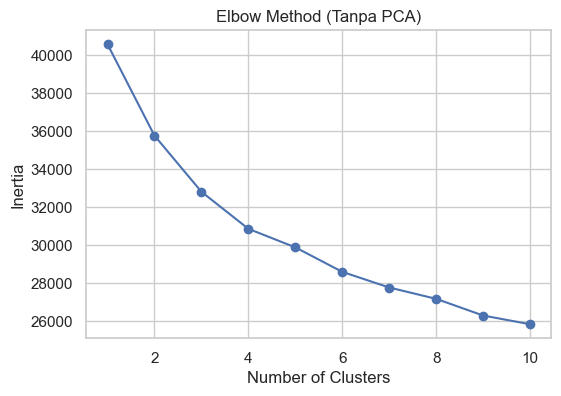

In [21]:
# Elbow Method untuk menentukan cluster
range_n_clusters = range(1, 11)  # Coba dari 1 sampai 10 cluster
inertia = []

for k in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=k,
        init='random',
        n_init=10,
        max_iter=500,
        random_state=111)
    kmeans_temp.fit(df_clean)
    inertia.append(kmeans_temp.inertia_)

# Plot Elbow
plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method (Tanpa PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
# Menentukan jumlah cluster yang diinginkan
k=3
kmeans = KMeans(n_clusters=k,
        init='random',
        n_init=10,
        max_iter=500,
        random_state=111)
kmeans.fit(df_clean)

# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_
print(labels)


# Menambahkan label cluster ke data
df_clean['Cluster'] = labels
df_clean

[0 2 2 ... 0 0 0]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,0.51,0.60,1,0,0,0.50,0.46,1,1,0.00,...,2,1,2,0.50,0,1,2,1,0.26,0
1,0.42,0.10,1,2,0,0.67,0.18,1,1,0.25,...,2,1,0,0.67,0,0,1,0,0.13,2
2,0.53,0.95,2,2,1,0.50,0.82,2,1,0.25,...,2,1,1,0.67,0,2,2,1,0.41,2
3,0.65,0.73,1,2,1,0.67,0.96,2,1,0.12,...,2,1,0,0.67,0,1,1,1,0.35,2
4,0.42,0.80,2,2,1,0.33,0.30,2,1,0.38,...,0,1,1,0.67,0,0,2,0,0.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.56,0.23,0,2,0,0.50,0.52,2,1,0.12,...,2,1,2,0.33,0,1,2,0,0.28,2
6603,0.51,0.40,0,2,0,0.67,0.62,2,1,0.38,...,0,1,2,0.33,0,1,2,0,0.30,1
6604,0.44,0.75,2,1,1,0.33,0.30,1,1,0.38,...,2,1,0,0.33,0,2,2,0,0.28,0
6605,0.21,0.65,0,0,1,0.33,0.82,0,1,0.25,...,2,0,2,0.50,0,1,0,0,0.28,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [23]:
# Evaluasi model menggunakan Silhouette Score
score = silhouette_score(df_clean, labels).round(2)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.18


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

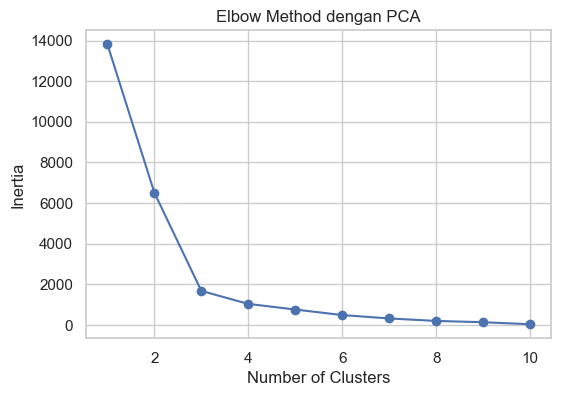

In [24]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_clean)

# Elbow Method untuk menentukan cluster
range_n_clusters = range(1, 11)  # Coba dari 1 sampai 10 cluster
inertia = []

for k in range_n_clusters:
    kmeans_temp = KMeans(
        n_clusters=k,
        init='random',
        n_init=10,
        max_iter=500,
        random_state=42
    )
    kmeans_temp.fit(data_pca)
    inertia.append(kmeans_temp.inertia_)

# Plot Elbow
plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method dengan PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:

# Terapkan K-Means pada data yang telah direduksi dimensinya
k=3
kmeans_pca = KMeans(n_clusters=k,
        init='random',
        n_init=10,
        max_iter=300,
        random_state=111)
kmeans_pca.fit(data_pca)

# Mendapatkan label cluster
labels_pca = kmeans_pca.labels_

# Evaluasi menggunakan Silhouette Score
score_pca = silhouette_score(data_pca, labels_pca).round(2)
print(f'Silhouette Score setelah PCA: {score_pca}')

Silhouette Score setelah PCA: 0.75


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

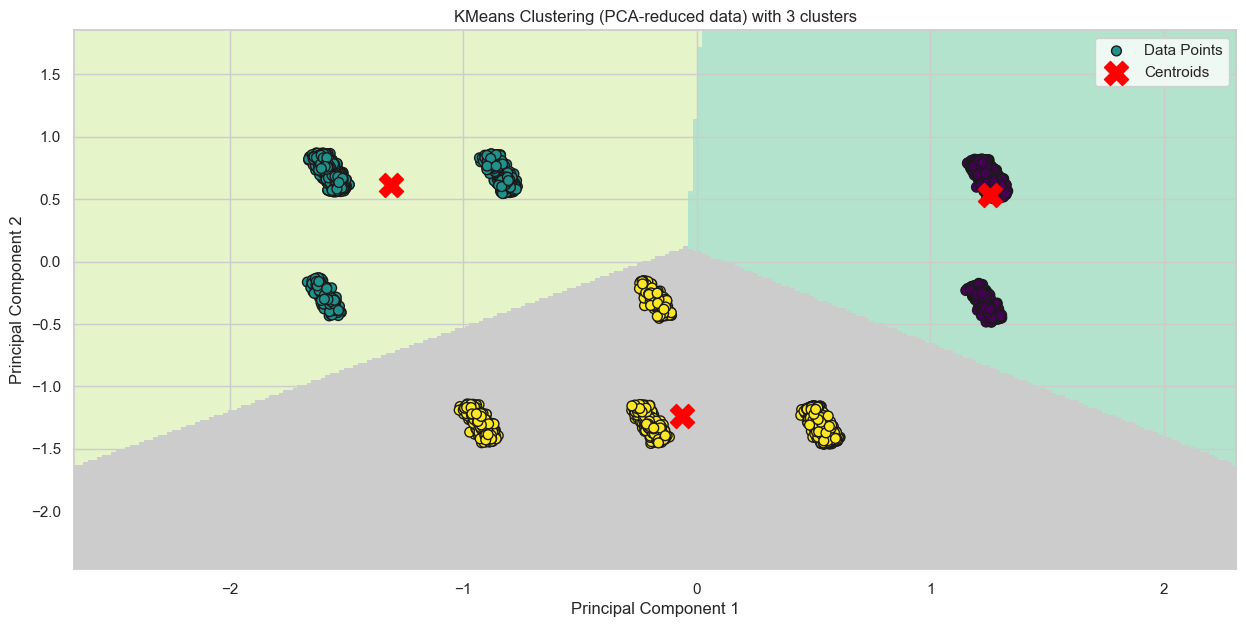

In [26]:
# Visualisasi hasil clustering
centroids_pca = kmeans_pca.cluster_centers_

# Tentukan langkah untuk grid mesh
h = 0.02
x_min, x_max = data_pca[:, 0].min() - 1, data_pca[:, 0].max() + 1
y_min, y_max = data_pca[:, 1].min() - 1, data_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi untuk setiap titik pada grid
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Gambar hasil visualisasi
plt.figure(figsize=(15, 7))
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Plot data poin dengan warna berdasarkan label cluster
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, s=50, cmap='viridis', edgecolors='k', label='Data Points')

# Plot centroid cluster
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KMeans Clustering (PCA-reduced data) with {k} clusters')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [27]:
# Adding cluster labels
df_clean['Cluster'] = kmeans_pca.labels_

In [28]:
# Sekarang, kita terapkan inverse transform pada setiap kolom untuk mengembalikan nilai kategorikal asli
for col in kategorikal_cols:
    if col in label_encoders:  # Memastikan encoder ada
        df_clean[col] = label_encoders[col].inverse_transform(df_clean[col])
    else:
        print(f"Encoder untuk kolom {col} tidak ditemukan!")

# Menampilkan dataset setelah inverse transform
print("\nDataset setelah Inverse Transform:")
df_clean


Dataset setelah Inverse Transform:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,0.51,0.60,Low,High,No,0.50,0.46,Low,Yes,0.00,...,Medium,Public,Positive,0.50,No,High School,Near,Male,0.26,1
1,0.42,0.10,Low,Medium,No,0.67,0.18,Low,Yes,0.25,...,Medium,Public,Negative,0.67,No,College,Moderate,Female,0.13,0
2,0.53,0.95,Medium,Medium,Yes,0.50,0.82,Medium,Yes,0.25,...,Medium,Public,Neutral,0.67,No,Postgraduate,Near,Male,0.41,0
3,0.65,0.73,Low,Medium,Yes,0.67,0.96,Medium,Yes,0.12,...,Medium,Public,Negative,0.67,No,High School,Moderate,Male,0.35,0
4,0.42,0.80,Medium,Medium,Yes,0.33,0.30,Medium,Yes,0.38,...,High,Public,Neutral,0.67,No,College,Near,Female,0.33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.56,0.23,High,Medium,No,0.50,0.52,Medium,Yes,0.12,...,Medium,Public,Positive,0.33,No,High School,Near,Female,0.28,0
6603,0.51,0.40,High,Medium,No,0.67,0.62,Medium,Yes,0.38,...,High,Public,Positive,0.33,No,High School,Near,Female,0.30,2
6604,0.44,0.75,Medium,Low,Yes,0.33,0.30,Low,Yes,0.38,...,Medium,Public,Negative,0.33,No,Postgraduate,Near,Female,0.28,1
6605,0.21,0.65,High,High,Yes,0.33,0.82,High,Yes,0.25,...,Medium,Private,Positive,0.50,No,High School,Far,Female,0.28,1


In [29]:
#Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
hasil_clustering = df_clean.copy()
hasil_clustering

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,0.51,0.60,Low,High,No,0.50,0.46,Low,Yes,0.00,...,Medium,Public,Positive,0.50,No,High School,Near,Male,0.26,1
1,0.42,0.10,Low,Medium,No,0.67,0.18,Low,Yes,0.25,...,Medium,Public,Negative,0.67,No,College,Moderate,Female,0.13,0
2,0.53,0.95,Medium,Medium,Yes,0.50,0.82,Medium,Yes,0.25,...,Medium,Public,Neutral,0.67,No,Postgraduate,Near,Male,0.41,0
3,0.65,0.73,Low,Medium,Yes,0.67,0.96,Medium,Yes,0.12,...,Medium,Public,Negative,0.67,No,High School,Moderate,Male,0.35,0
4,0.42,0.80,Medium,Medium,Yes,0.33,0.30,Medium,Yes,0.38,...,High,Public,Neutral,0.67,No,College,Near,Female,0.33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.56,0.23,High,Medium,No,0.50,0.52,Medium,Yes,0.12,...,Medium,Public,Positive,0.33,No,High School,Near,Female,0.28,0
6603,0.51,0.40,High,Medium,No,0.67,0.62,Medium,Yes,0.38,...,High,Public,Positive,0.33,No,High School,Near,Female,0.30,2
6604,0.44,0.75,Medium,Low,Yes,0.33,0.30,Low,Yes,0.38,...,Medium,Public,Negative,0.33,No,Postgraduate,Near,Female,0.28,1
6605,0.21,0.65,High,High,Yes,0.33,0.82,High,Yes,0.25,...,Medium,Private,Positive,0.50,No,High School,Far,Female,0.28,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [30]:
# Mengembalikan data yang dinormalisasi ke skala asli
hasil_clustering[numerik_cols] = scaler.inverse_transform(hasil_clustering[numerik_cols])

# Tampilkan data setelah inverse transform (kembali ke skala asli)
print("\nData setelah inverse transform (kembali ke skala asli):")
hasil_clustering[numerik_cols]


Data setelah inverse transform (kembali ke skala asli):


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,22.93,84.0,7.00,73.0,0.00,3.00,66.96
1,19.06,64.0,8.02,59.0,2.00,4.02,60.98
2,23.79,98.0,7.00,91.0,2.00,4.02,73.86
3,28.95,89.2,8.02,98.0,0.96,4.02,71.10
4,19.06,92.0,5.98,65.0,3.04,4.02,70.18
...,...,...,...,...,...,...,...
6602,25.08,69.2,7.00,76.0,0.96,1.98,67.88
6603,22.93,76.0,8.02,81.0,3.04,1.98,68.80
6604,19.92,90.0,5.98,65.0,3.04,1.98,67.88
6605,10.03,86.0,5.98,91.0,2.00,3.00,67.88


In [31]:
hasil_clustering

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,22.93,84.0,Low,High,No,7.00,73.0,Low,Yes,0.00,...,Medium,Public,Positive,3.00,No,High School,Near,Male,66.96,1
1,19.06,64.0,Low,Medium,No,8.02,59.0,Low,Yes,2.00,...,Medium,Public,Negative,4.02,No,College,Moderate,Female,60.98,0
2,23.79,98.0,Medium,Medium,Yes,7.00,91.0,Medium,Yes,2.00,...,Medium,Public,Neutral,4.02,No,Postgraduate,Near,Male,73.86,0
3,28.95,89.2,Low,Medium,Yes,8.02,98.0,Medium,Yes,0.96,...,Medium,Public,Negative,4.02,No,High School,Moderate,Male,71.10,0
4,19.06,92.0,Medium,Medium,Yes,5.98,65.0,Medium,Yes,3.04,...,High,Public,Neutral,4.02,No,College,Near,Female,70.18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.08,69.2,High,Medium,No,7.00,76.0,Medium,Yes,0.96,...,Medium,Public,Positive,1.98,No,High School,Near,Female,67.88,0
6603,22.93,76.0,High,Medium,No,8.02,81.0,Medium,Yes,3.04,...,High,Public,Positive,1.98,No,High School,Near,Female,68.80,2
6604,19.92,90.0,Medium,Low,Yes,5.98,65.0,Low,Yes,3.04,...,Medium,Public,Negative,1.98,No,Postgraduate,Near,Female,67.88,1
6605,10.03,86.0,High,High,Yes,5.98,91.0,High,Yes,2.00,...,Medium,Private,Positive,3.00,No,High School,Far,Female,67.88,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [32]:
# Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia 
# Menghitung statistik deskriptif berdasarkan cluster
cluster_stats = hasil_clustering.groupby('Cluster')[['Exam_Score', 'Hours_Studied']].describe()
cluster_stats

Exam_Score                                                         \
             count       mean       std   min    25%    50%    75%    max   
Cluster                                                                     
0           2361.0  66.850114  3.242494  59.6  65.12  66.96  68.80  74.32   
1           2165.0  67.142938  3.372659  59.6  65.12  66.96  70.18  74.32   
2           2081.0  67.402316  3.350869  59.6  65.12  66.96  70.18  74.32   

        Hours_Studied                                                        
                count       mean       std   min    25%    50%    75%   max  
Cluster                                                                      
0              2361.0  19.922732  5.862353  4.44  16.05  19.92  23.79  35.4  
1              2165.0  20.086836  6.009943  4.44  16.05  19.92  23.79  35.4  
2              2081.0  19.948309  5.842078  4.44  16.05  19.92  23.79  35.4

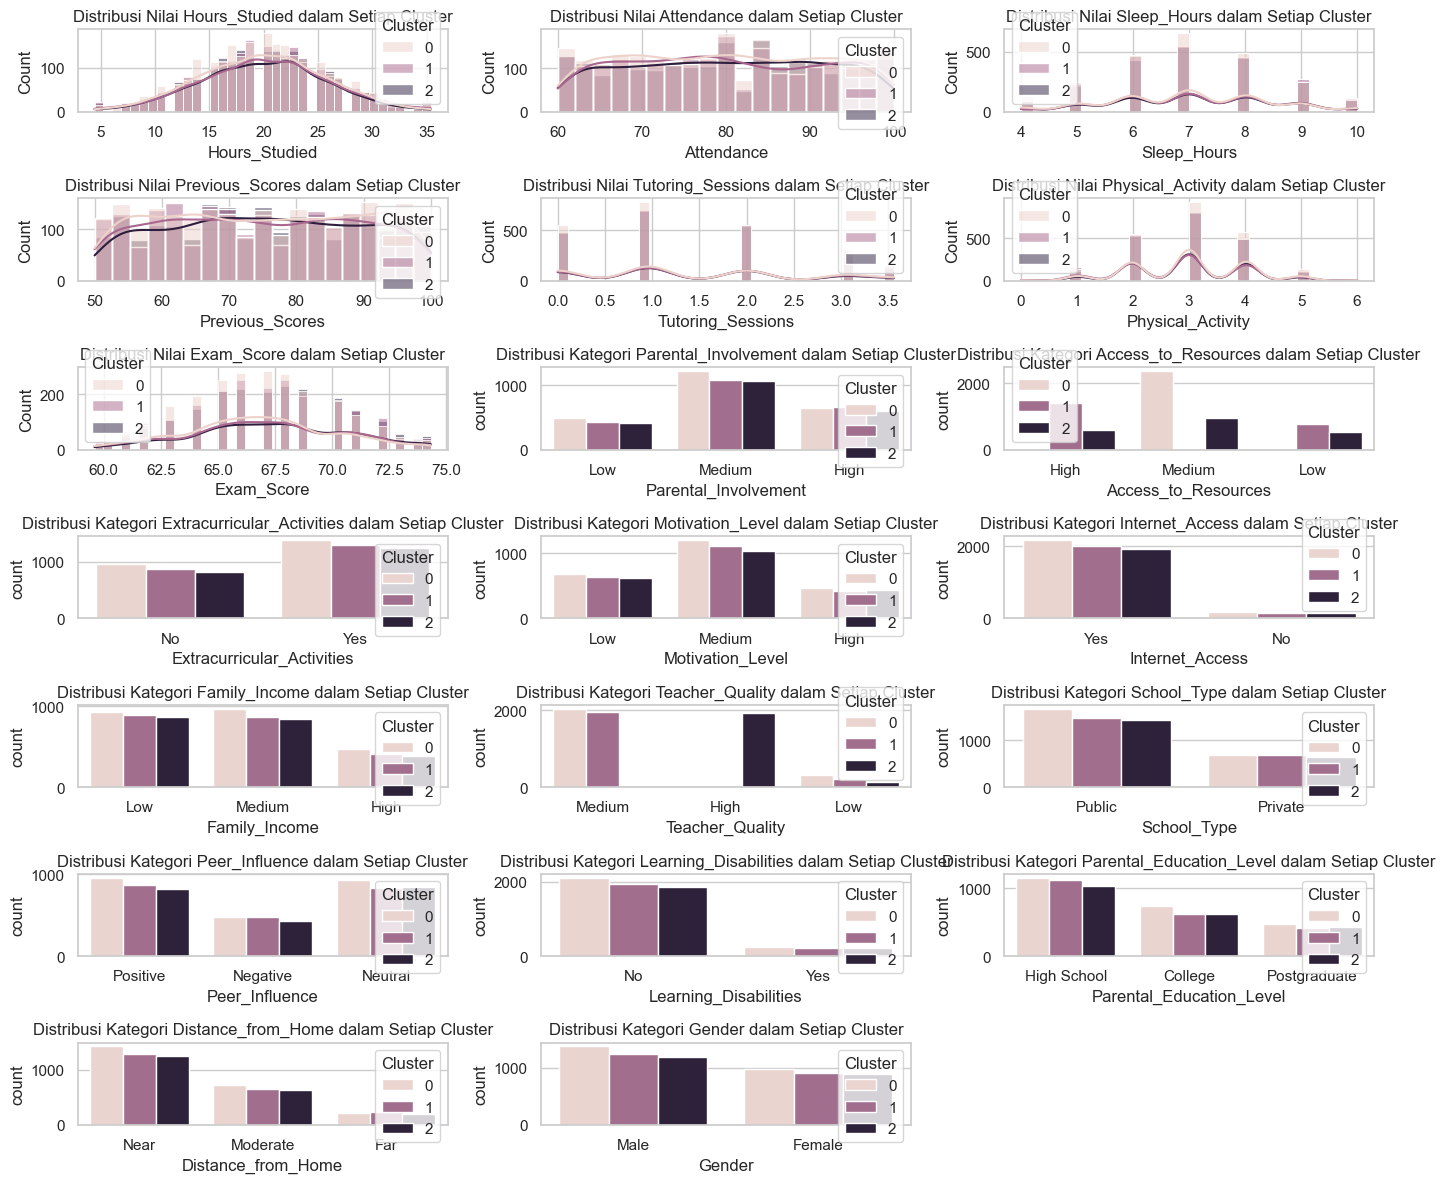

In [33]:
# Menghitung jumlah subplot yang diperlukan
num_plots = len(numerik_cols) + len(kategorikal_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Menghitung jumlah baris, menyesuaikan jika ada lebih dari 3 kolom

# Visualisasi distribusi nilai untuk setiap fitur numerik dalam setiap cluster
plt.figure(figsize=(14, 12))

# Untuk kolom numerik
for i, col in enumerate(numerik_cols):
    plt.subplot(rows, 3, i + 1)  # Sesuaikan jumlah baris dan kolom
    sns.histplot(data=hasil_clustering, x=col, hue='Cluster', kde=True)
    plt.title(f"Distribusi Nilai {col} dalam Setiap Cluster")

# Untuk kolom kategorikal
for j, col in enumerate(kategorikal_cols):
    plt.subplot(rows, 3, len(numerik_cols) + j + 1)  # Menambahkan subplot untuk kolom kategorikal
    sns.countplot(data=hasil_clustering, x=col, hue='Cluster')
    plt.title(f"Distribusi Kategori {col} dalam Setiap Cluster")

# Menampilkan semua plot dengan layout yang rapi
plt.tight_layout()
plt.show()

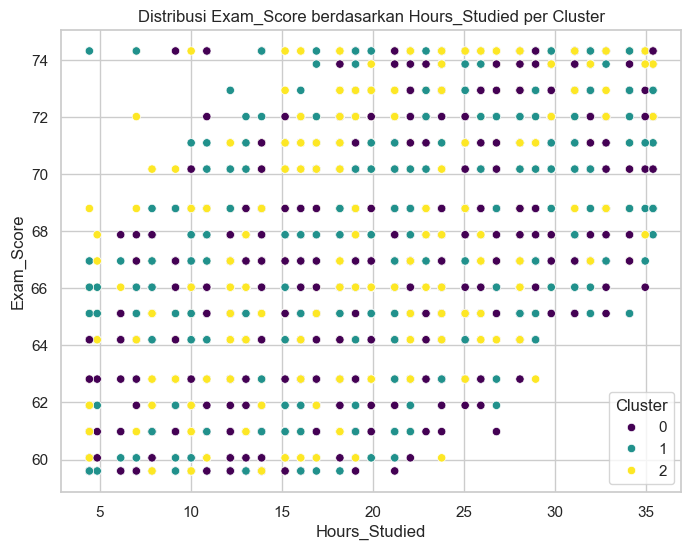

In [34]:
# Visualisasi distribusi Exam_Score berdasarkan Hours_Studied, Attendance, dan Parental_Involvement
# 1. Scatterplot Exam_Score vs Hours_Studied berdasarkan Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Cluster', data=hasil_clustering, palette='viridis')
plt.title('Distribusi Exam_Score berdasarkan Hours_Studied per Cluster')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.legend(title='Cluster')
plt.show()

## **Analisis Karakteristik Cluster dari Model K-Means**
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1. Cluster 0: 
- Rata-rata Exam Score : 66.85
- Rata-rata Hours Studied : 19.92 jam
- Analisis : Cluster ini mencakup siswa dengan intensitas belajar yang sedang dan nilai yang lebih rendah. Meskipun waktu belajar yang mereka habiskan sudah cukup, nilai ujian mereka cenderung lebih rendah dibandingkan dengan cluster lain. Distribusi nilai menunjukkan bahwa mereka memiliki partisipasi yang tinggi dalam kegiatan ekstrakurikuler serta kualitas pengajaran yang tergolong sedang, yang turut mempengaruhi hasil ujian.

2. Cluster 1: 
- Rata-rata Exam Score : 67.14
- Rata-rata Hours Studied : 20.09 jam
- Analisis : Cluster ini menunjukkan siswa yang menghabiskan sedikit lebih banyak waktu untuk belajar namun nilai ujian mereka berada pada kategori sedang di banding cluster lain. Distribusi nilai menunjukkan semua faktor berada di tingkat tengah berarti siswa di Cluster 1 memiliki karakteristik yang relatif seimbang. Mereka tidak menunjukkan kelebihan atau kekurangan yang ekstrem pada faktor-faktor yang mempengaruhi nilai ujian. Dengan kata lain, performa mereka dipengaruhi oleh kombinasi berbagai faktor yang masing-masing berada di posisi sedang, sehingga perbedaan antar aktor tidak mecolok.

3. Cluster 2:
- Rata-rata Exam Score : 67.40
- Rata-rata Hours Studied : 19.95 jam
- Analisis : Siswa dalam cluster ini memiliki durasi belajar yang hampir serupa dengan cluster lain, namun berhasil meraih nilai ujian yang lebih tinggi. Perbedaan ini kemungkinan didukung oleh kualitas pengajaran yang lebih tinggi, sehingga waktu belajar yang dihabiskan menjadi lebih efektif dalam meningkatkan performa ujian.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Menyimpan DataFrame hasil_clustering ke file CSV
hasil_clustering.to_csv('hasil_clustering.csv', index=False)